<a href="https://colab.research.google.com/github/thinnarat007/python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

*โหลดข้อมูล* Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป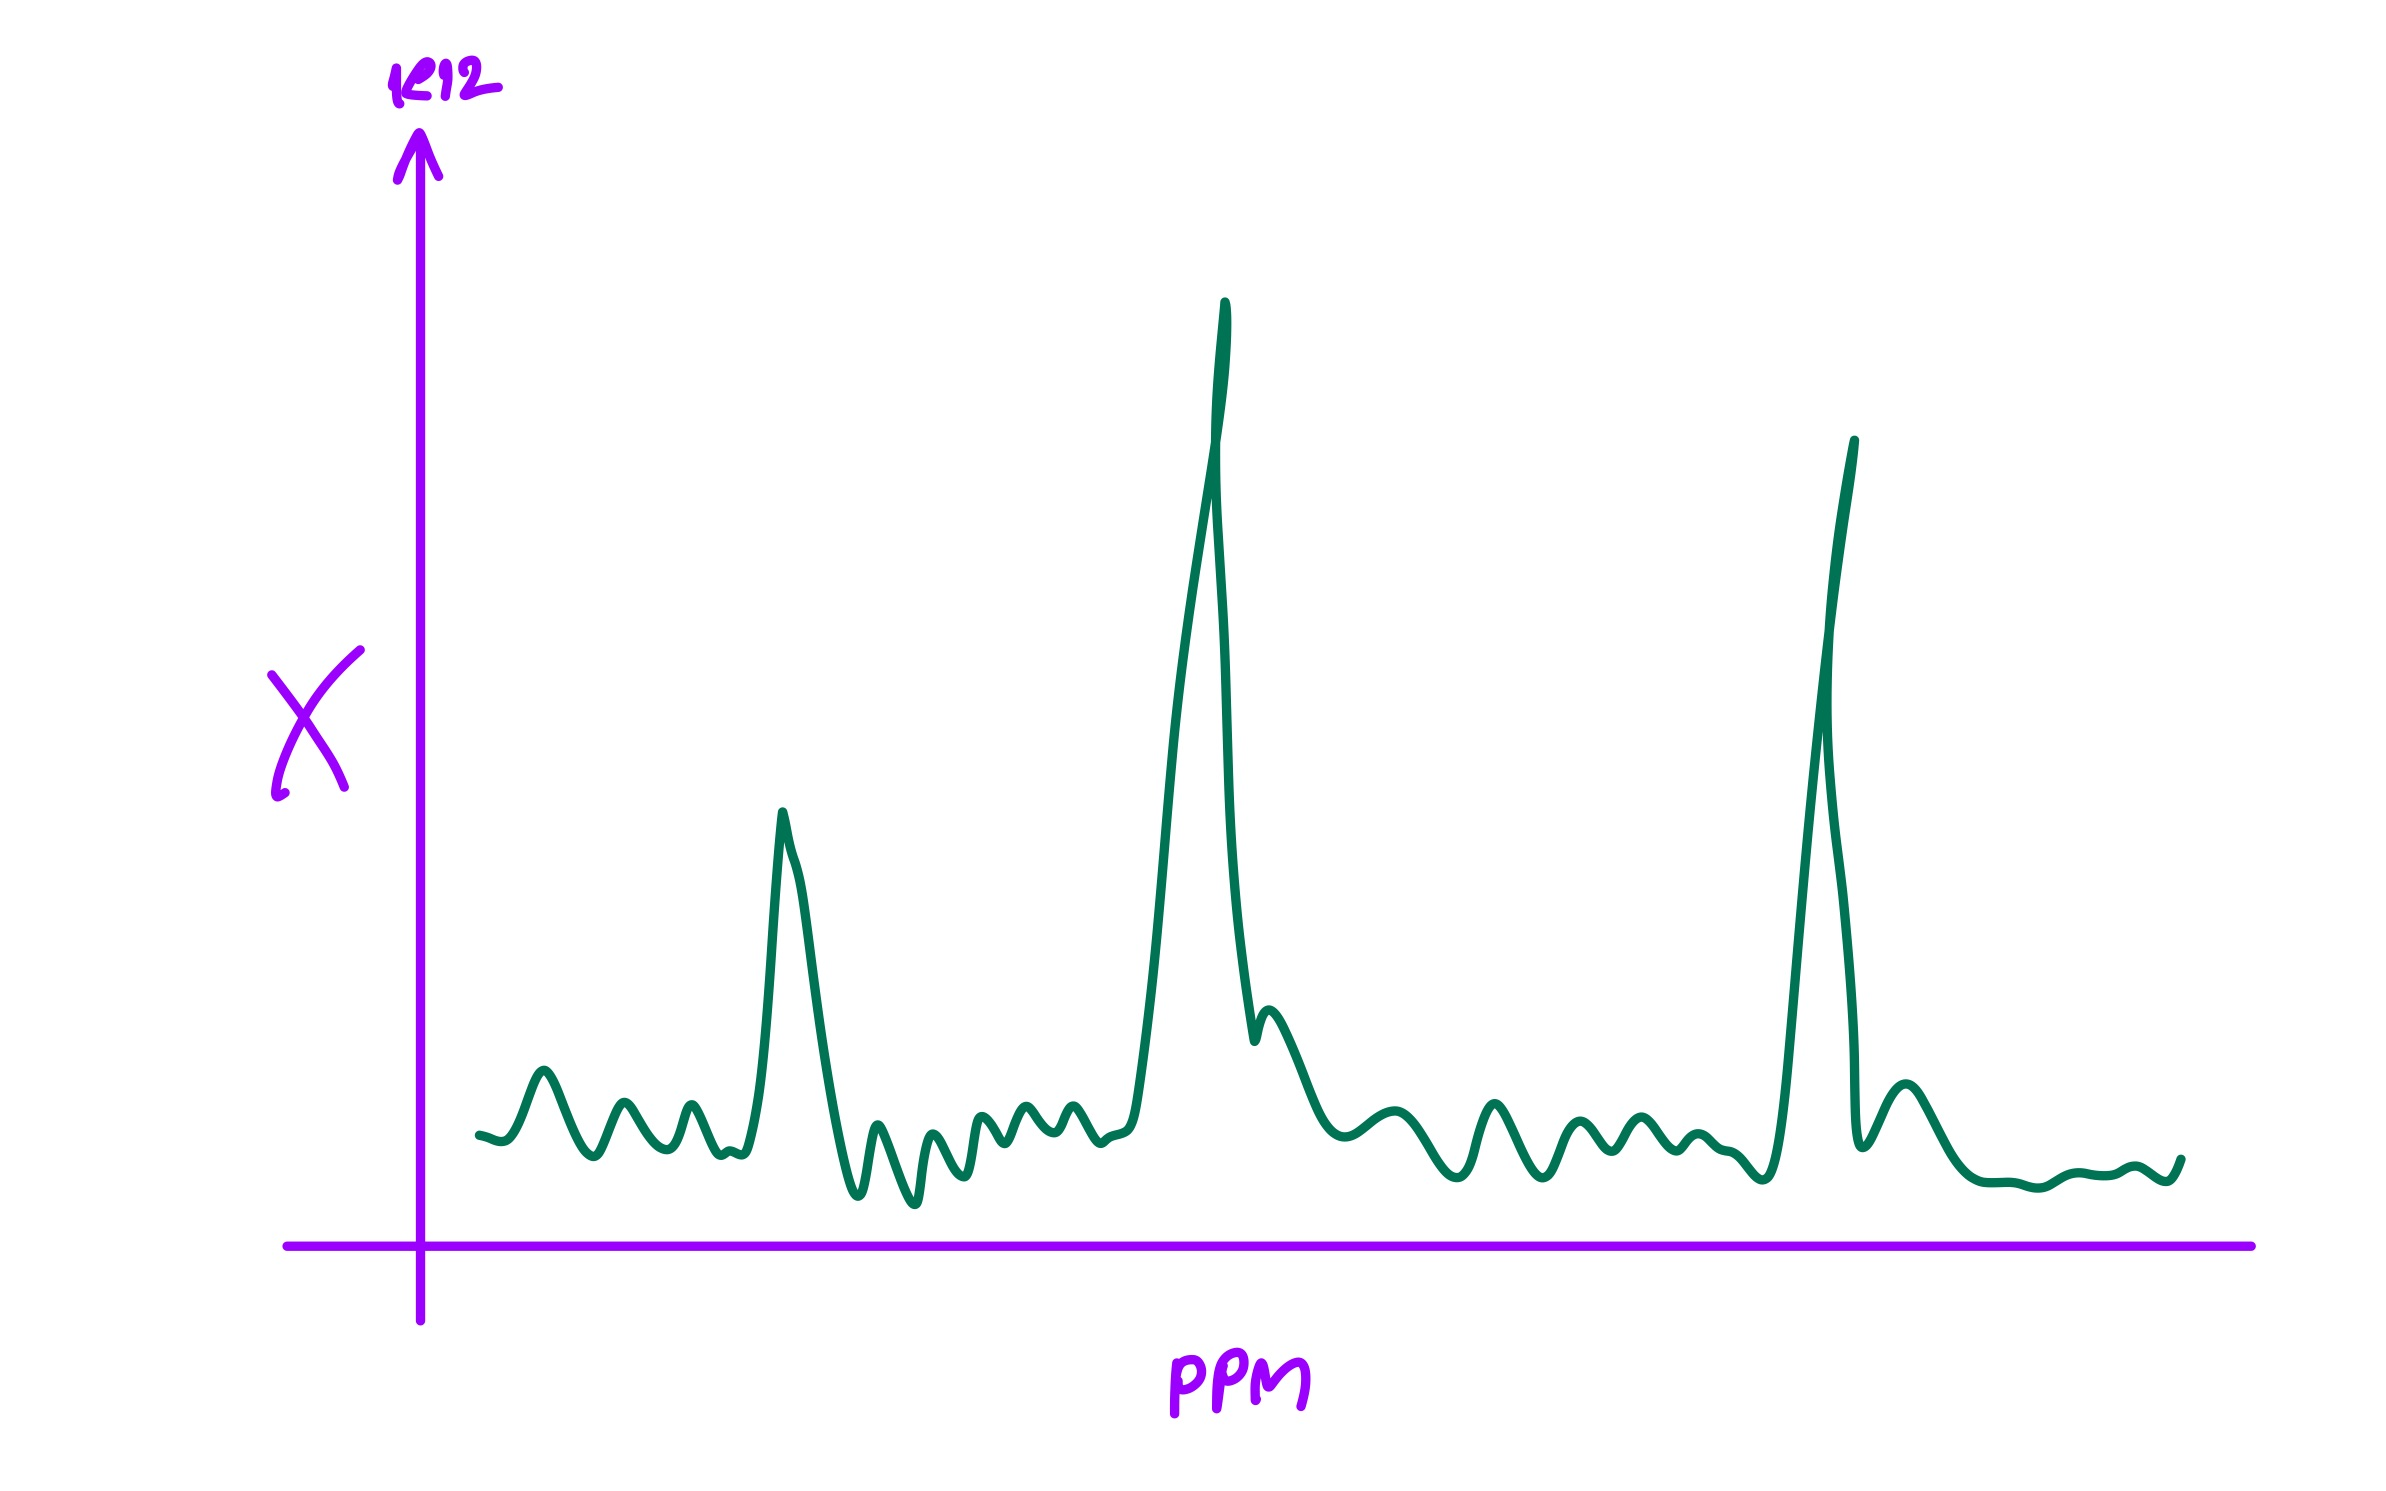

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
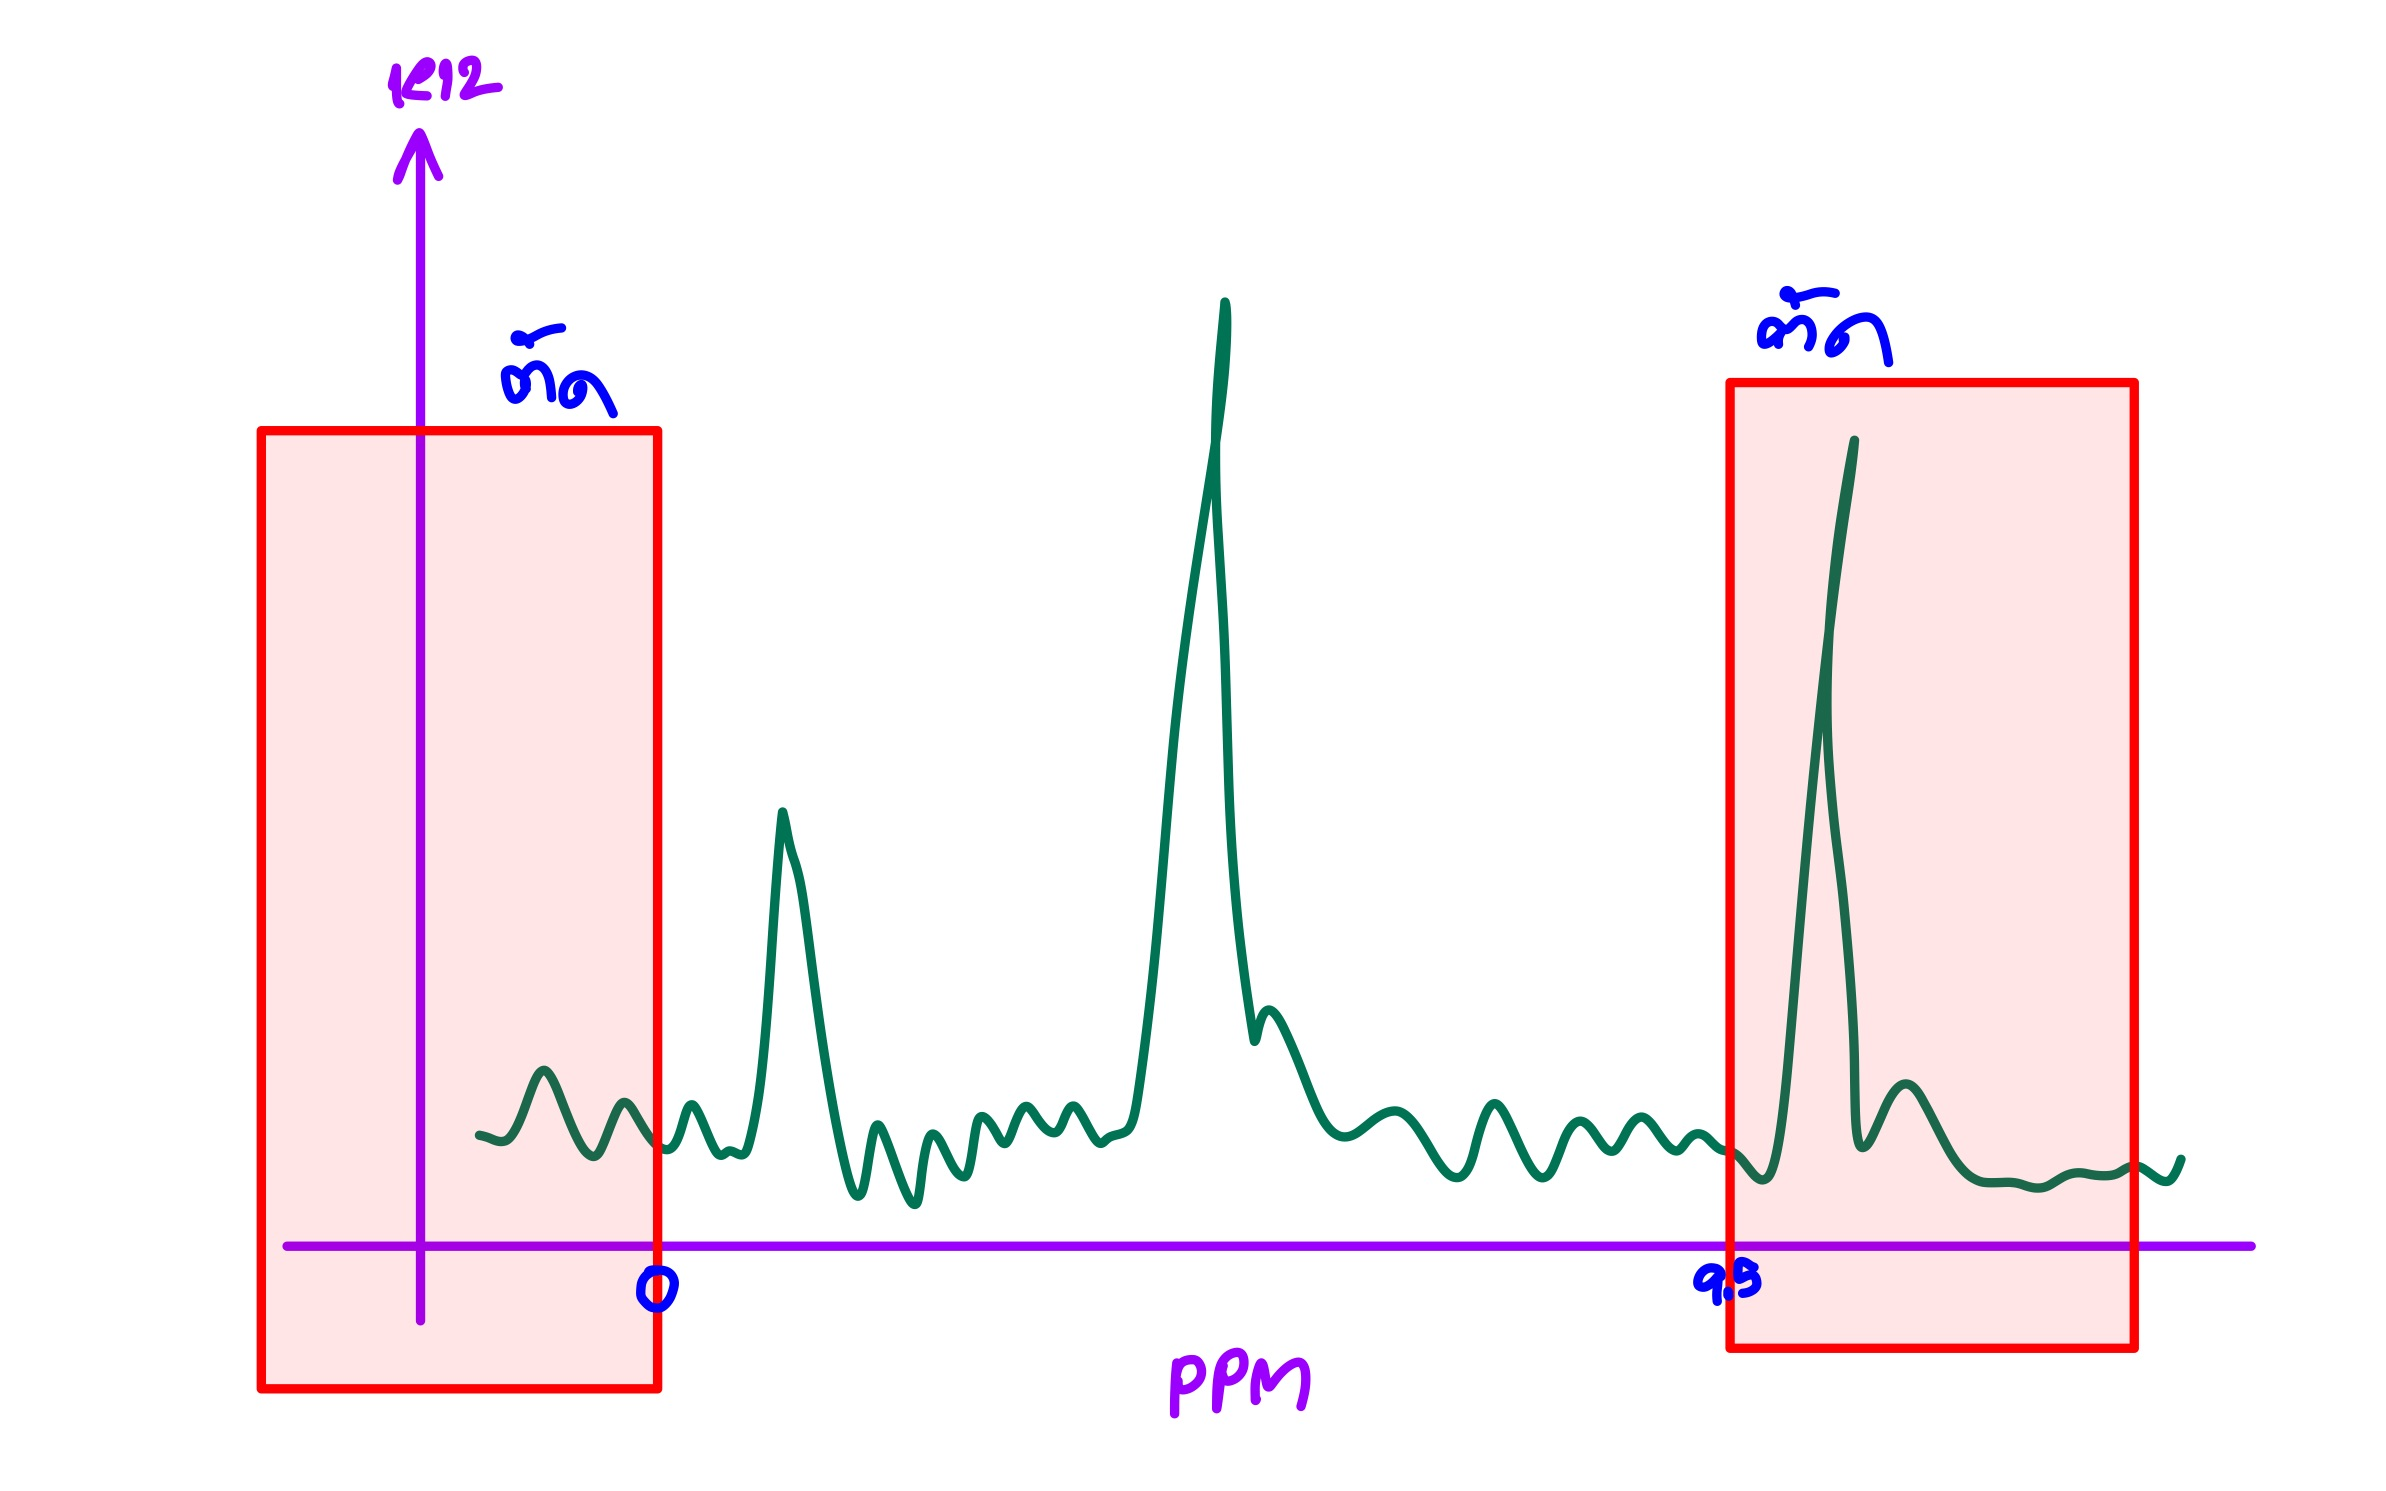

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
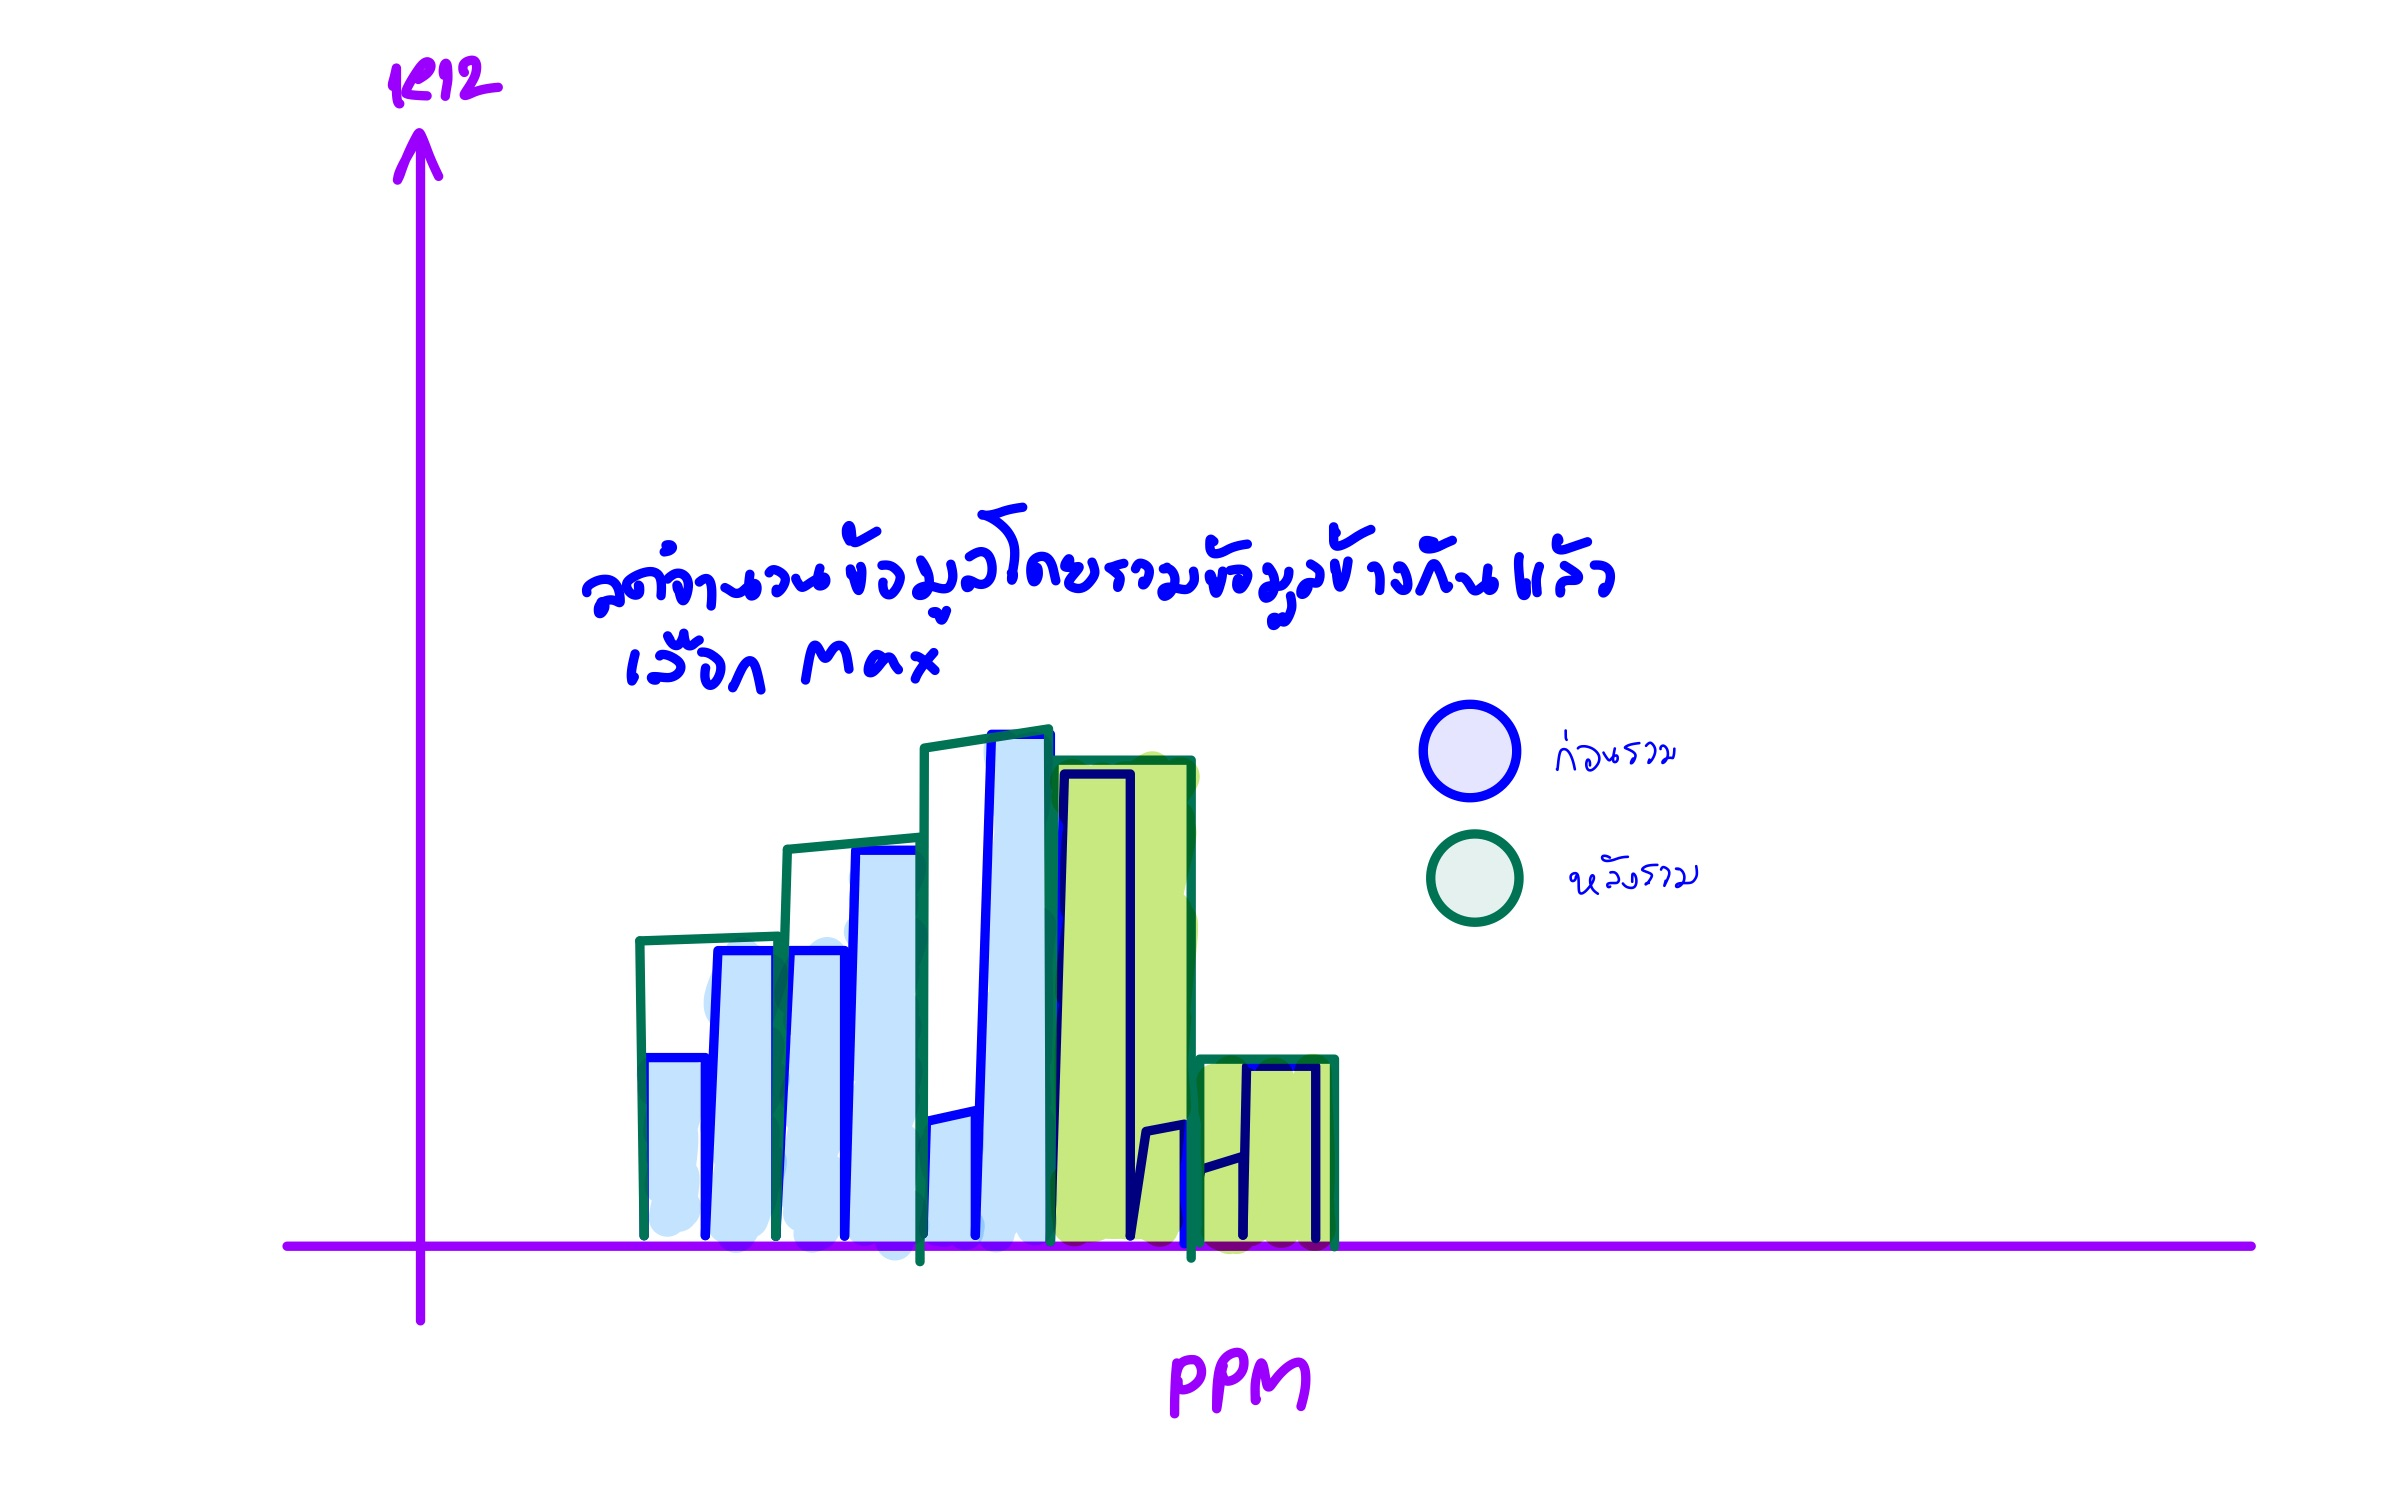

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [34]:
import numpy as np
import pandas as pd
import os

In [35]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [47]:
# ขั้นตอนที่ 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ขั้นตอนที่ 2: ระบุ path ของไฟล์ pickle
path = '/content/drive/MyDrive/Data_viz2024_Data/Xnn_ppm.pickle'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# ขั้นตอนที่ 3: โหลดข้อมูลจากไฟล์ pickle
import pickle
import numpy as np

with open(path, 'rb') as file:
    data = pickle.load(file)  # สมมติว่าเป็น Numpy Array หรือ DataFrame

In [50]:
# ตรวจสอบชนิดข้อมูลใน tuple
print(f'Type of data: {type(data)}, Length: {len(data)}')

# ดูรายละเอียดของข้อมูลในแต่ละส่วนของ tuple
for i, item in enumerate(data):
    print(f'Item {i}: Type: {type(item)}')
    if hasattr(item, 'shape'):
        print(f'  Shape: {item.shape}')
    elif hasattr(item, '__len__'):
        print(f'  Length: {len(item)}')
    print(f'  Sample: {item[:5] if hasattr(item, "__getitem__") else item}')


Type of data: <class 'tuple'>, Length: 2
Item 0: Type: <class 'numpy.ndarray'>
  Shape: (51, 65536)
  Sample: [[13698496.87862849 13690427.85411995 12788968.23910642 ...
   1886684.39788299  3117794.36625193  3349504.        ]
 [ 8556799.93134524  7907584.55473726  7289756.67464252 ...
   1365760.          1365760.          1365760.        ]
 [ 4740352.          4740352.          4740352.         ...
  -2022002.73927494 -2322528.39758231 -3078436.6363325 ]
 [ 7544576.          7544576.          7544576.         ...
   -199058.6111285   -216373.32369451  -216373.32369451]
 [11456256.         11456256.         11456256.         ...
  -1716670.97464988 -1660351.38318151 -1660351.38318151]]
Item 1: Type: <class 'numpy.ndarray'>
  Shape: (65536,)
  Sample: [10.87128    10.87109488 10.87090976 10.87072464 10.87053952]


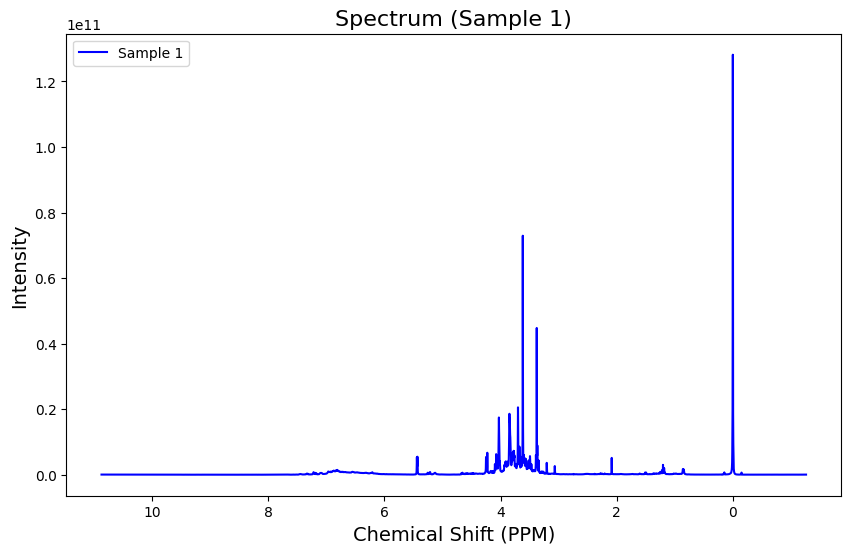

In [51]:
import matplotlib.pyplot as plt
import numpy as np


# data[0]: intensity_matrix (51, 65536) -> แต่ละแถวคือสเปกตรัมของตัวอย่าง
# data[1]: ppm_values (65536,) -> แกน X ของกราฟ

# โหลดข้อมูลตัวอย่าง (สมมติว่าชื่อข้อมูลเป็น data)
intensity_matrix = data[0]  # (51, 65536)
ppm_values = data[1]  # (65536,)

# เลือกแถว (ตัวอย่าง) ที่ต้องการแสดง (เช่น แถวที่ 0)
spectrum = intensity_matrix[0]  # เลือกสเปกตรัมแถวแรก

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(ppm_values, spectrum, label='Sample 1', color='blue')

# แกน X: Chemical Shift (PPM) - มักเรียงจากมากไปน้อย
plt.gca().invert_xaxis()
plt.xlabel('Chemical Shift (PPM)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Spectrum (Sample 1)', fontsize=16)
plt.legend()

# แสดงกราฟ
plt.show()


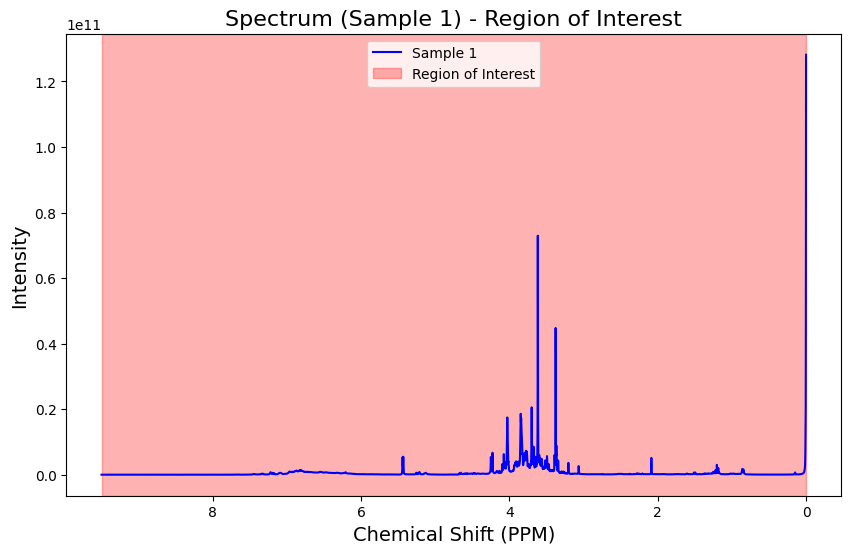

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#
intensity_matrix = data[0]  # (51, 65536)
ppm_values = data[1]  # (65536,)

# เลือกแถว (ตัวอย่าง) ที่ต้องการแสดง (เช่น แถวที่ 0)
spectrum = intensity_matrix[0]  # เลือกสเปกตรัมแถวแรก

# ตัดข้อมูลในช่วงที่น่าสนใจ
mask = (ppm_values > 0) & (ppm_values < 9.5)  # สร้าง mask สำหรับ PPM > 0 และ PPM < 9.5
filtered_ppm = ppm_values[mask]
filtered_spectrum = spectrum[mask]

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(filtered_ppm, filtered_spectrum, label='Sample 1', color='blue')

# เน้นช่วงที่สนใจด้วยกล่องสีแดง
plt.axvspan(0, 9.5, color='red', alpha=0.3, label='Region of Interest')

# แกน X: Chemical Shift (PPM)
plt.gca().invert_xaxis()
plt.xlabel('Chemical Shift (PPM)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Spectrum (Sample 1) - Region of Interest', fontsize=16)
plt.legend()

# แสดงกราฟ
plt.show()

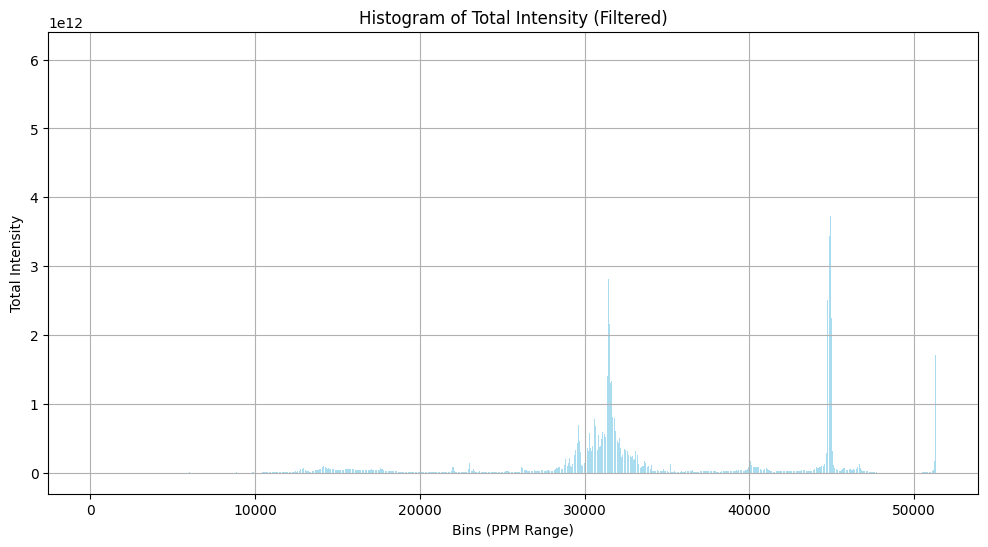

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 1. สมมติว่าคุณมี data ที่โหลดเข้ามาแล้ว
# intensity_matrix = data[0]  # (51, 65536)
# ppm_values = data[1]  # (65536,)

# 2. ตัดข้อมูลในช่วงที่น่าสนใจ
mask = (ppm_values > 0) & (ppm_values < 9.5)
filtered_ppm = ppm_values[mask]
filtered_intensity = intensity_matrix[:, mask]  # ตัดความเข้มข้นตาม mask

# 3. คำนวณค่าความเข้มข้นรวมในช่วงที่ตัดแล้ว
total_intensity = np.sum(filtered_intensity, axis=0)

# 4. สร้างกราฟฮิสโตแกรม
plt.figure(figsize=(12, 6))
plt.bar(range(len(total_intensity)), total_intensity, color='skyblue', alpha=0.7)

plt.title('Histogram of Total Intensity (Filtered)')
plt.xlabel('Bins (PPM Range)')
plt.ylabel('Total Intensity')
plt.grid()
plt.show()


In [68]:
# สมมติว่าคุณมี filtered_intensity ขนาด (51, 65536) หลังจากตัดข้อมูล
# ขั้นตอนการ quantize ข้อมูลให้เหลือ 51 x 400

# 1. กำหนดจำนวน bins ใหม่
target_bins = 400
bin_size = filtered_intensity.shape[1] // target_bins

# 2. สร้างอาเรย์สำหรับเก็บค่าความเข้มข้นที่ถูกควบรวม
quantized_intensity = np.zeros((filtered_intensity.shape[0], target_bins))

# 3. Quantization โดยการหาค่าความเข้มสูงสุดในแต่ละช่วง
for i in range(target_bins):
    start_index = i * bin_size
    end_index = start_index + bin_size
    # ตรวจสอบว่า end_index ไม่เกินขนาดข้อมูลเดิม
    if end_index > filtered_intensity.shape[1]:
        end_index = filtered_intensity.shape[1]
    quantized_intensity[:, i] = np.max(filtered_intensity[:, start_index:end_index], axis=1)

# แสดงผลรูปแบบของ quantized_intensity
print("Quantized Intensity Shape:", quantized_intensity.shape)

Quantized Intensity Shape: (51, 400)


Quantized Intensity Shape: (51, 400)


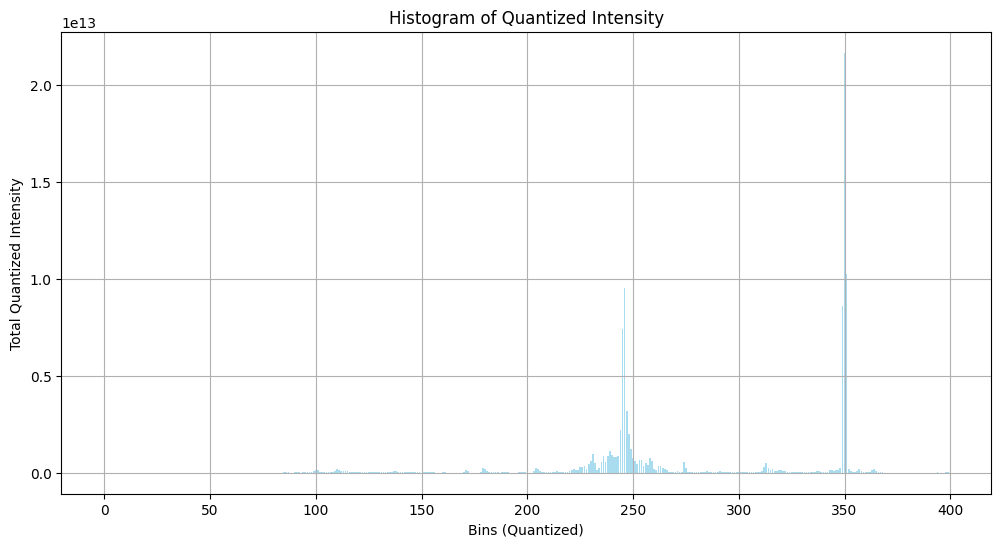

In [69]:
# แสดงผลรูปแบบของ quantized_intensity
print("Quantized Intensity Shape:", quantized_intensity.shape)

# 4. สร้างกราฟฮิสโตแกรมจาก quantized_intensity
total_quantized_intensity = np.sum(quantized_intensity, axis=0)

plt.figure(figsize=(12, 6))
plt.bar(range(len(total_quantized_intensity)), total_quantized_intensity, color='skyblue', alpha=0.7)
plt.title('Histogram of Quantized Intensity')
plt.xlabel('Bins (Quantized)')
plt.ylabel('Total Quantized Intensity')
plt.grid()
plt.show()

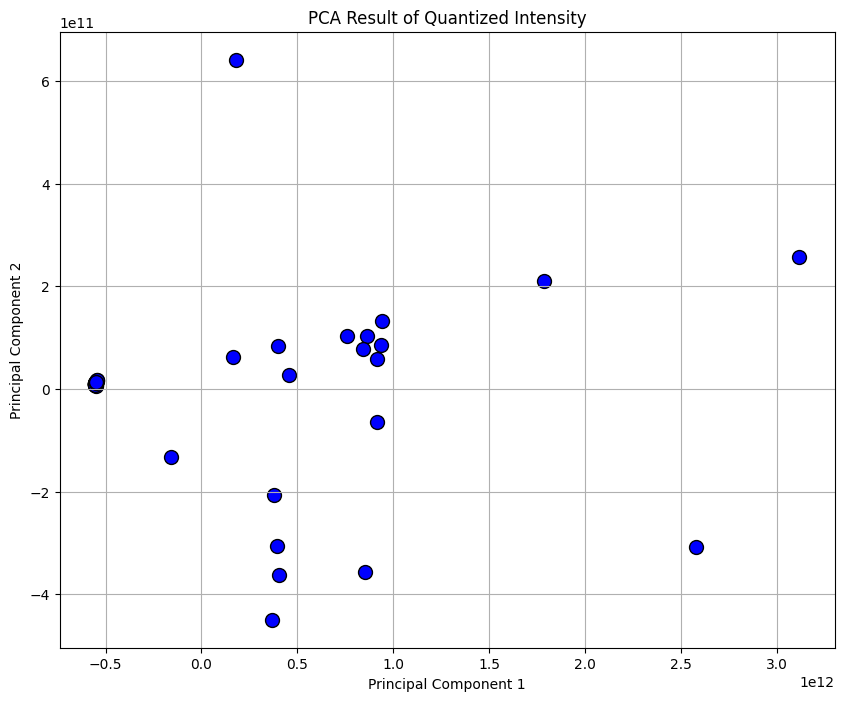

Explained Variance Ratio: [0.94383973 0.03409958]


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# สมมติว่าคุณมี quantized_intensity ขนาด (51, 400)
# 1. สร้าง PCA model
pca = PCA(n_components=2)  # ลดมิติข้อมูลเป็น 2 มิติสำหรับการ visualization

# 2. ทำ PCA บน quantized_intensity
pca_result = pca.fit_transform(quantized_intensity)

# 3. สร้างกราฟ scatter plot สำหรับแสดงผล PCA
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=100)

# เพิ่มชื่อแกน
plt.title('PCA Result of Quantized Intensity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# เพิ่มกริด
plt.grid()
plt.show()

# 4. แสดงค่า explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


<ipython-input-74-192d86b92106>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)


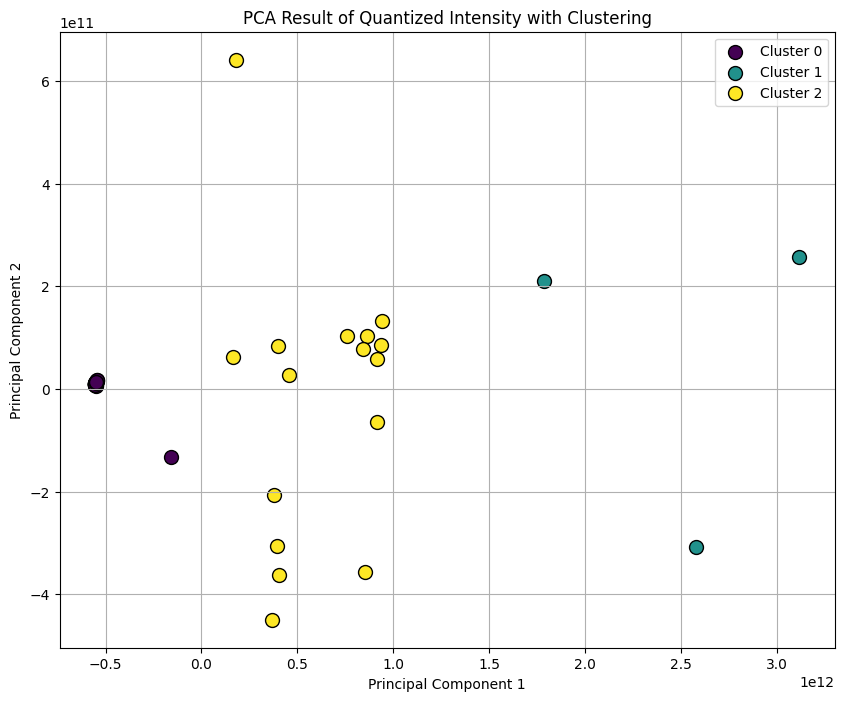

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. ทำ PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(quantized_intensity)

# 2. ใช้ KMeans เพื่อจัดกลุ่มข้อมูล (จำนวนกลุ่มที่ต้องการตั้ง)
n_clusters = 3  # เปลี่ยนแปลงตามจำนวนกลุ่มที่คุณต้องการ
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(pca_result)

# 3. สร้างกราฟ scatter plot สำหรับแสดงผล PCA
plt.figure(figsize=(10, 8))

# กำหนดสีสำหรับแต่ละกลุ่ม
colors = plt.cm.get_cmap('viridis', n_clusters)

for i in range(n_clusters):
    plt.scatter(pca_result[clusters == i, 0],
                pca_result[clusters == i, 1],
                color=colors(i),
                label=f'Cluster {i}',
                edgecolor='k',
                s=100)

# เพิ่มชื่อแกน
plt.title('PCA Result of Quantized Intensity with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# เพิ่มกริด
plt.grid()
plt.legend()
plt.show()


<ipython-input-75-3eeecdbcc4e3>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)


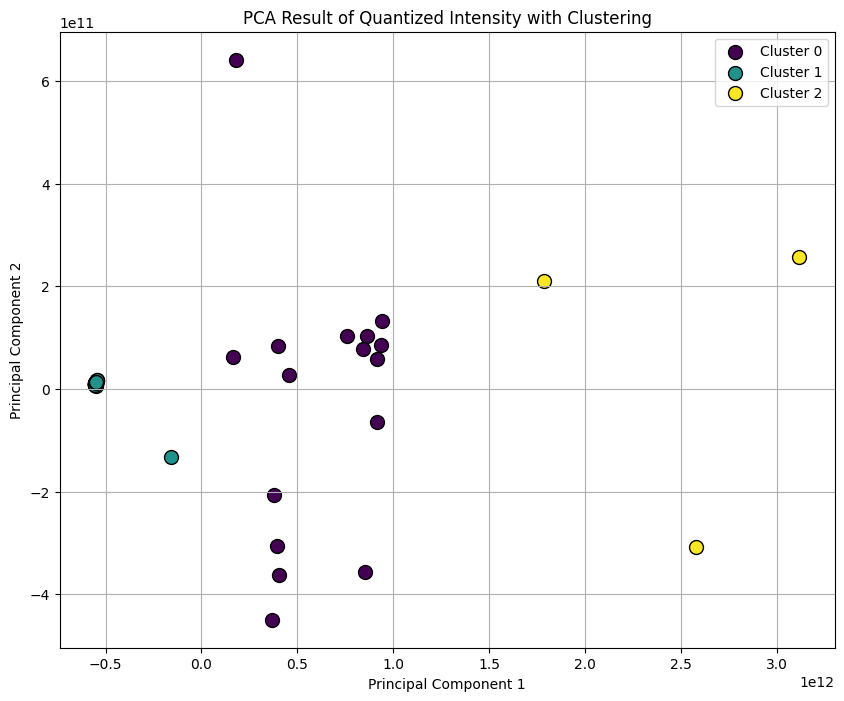

The data contains 3 clusters.


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# สมมติว่าคุณมี quantized_intensity ขนาด (51, 400)
# 1. ทำ PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(quantized_intensity)

# 2. ใช้ KMeans เพื่อจัดกลุ่มข้อมูล
n_clusters = 3  # ปรับค่าตามที่ต้องการ (สามารถใช้วิธีอื่นเช่น elbow method เพื่อหาจำนวนกลุ่มที่เหมาะสม)
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(pca_result)

# 3. สร้างกราฟ scatter plot สำหรับแสดงผล PCA พร้อมการจัดกลุ่ม
plt.figure(figsize=(10, 8))

# กำหนดสีสำหรับแต่ละกลุ่ม
colors = plt.cm.get_cmap('viridis', n_clusters)

for i in range(n_clusters):
    plt.scatter(pca_result[clusters == i, 0],
                pca_result[clusters == i, 1],
                color=colors(i),
                label=f'Cluster {i}',
                edgecolor='k',
                s=100)

# เพิ่มชื่อแกน
plt.title('PCA Result of Quantized Intensity with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# เพิ่มกริด
plt.grid()
plt.legend()
plt.show()

# 4. แสดงจำนวนกลุ่ม
unique_clusters = np.unique(clusters)
print(f'The data contains {len(unique_clusters)} clusters.')


In [76]:
# 1. สร้าง DataFrame
data_points = np.arange(len(clusters))  # หมายเลขของจุดข้อมูล
df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])  # ผลลัพธ์จาก PCA
df['Cluster'] = clusters  # เพิ่มคอลัมน์สำหรับกลุ่ม

# 2. แสดงผล DataFrame
print(df)

# 3. (ถ้าต้องการ) บันทึก DataFrame ลงไฟล์ CSV
df.to_csv('clustered_data.csv', index=False)

             PC1           PC2  Cluster
0  -5.510320e+11  1.114919e+10        1
1  -5.503732e+11  1.218689e+10        1
2  -5.521917e+11  1.083279e+10        1
3  -5.526674e+11  1.056511e+10        1
4  -5.467747e+11  1.529962e+10        1
5  -5.496501e+11  1.601124e+10        1
6  -5.522665e+11  1.093775e+10        1
7  -5.514448e+11  1.050829e+10        1
8  -5.513530e+11  1.111623e+10        1
9  -5.523058e+11  1.137820e+10        1
10 -5.508866e+11  1.200393e+10        1
11 -5.529553e+11  1.055349e+10        1
12 -5.525016e+11  1.143788e+10        1
13 -5.459642e+11  1.703659e+10        1
14 -5.519831e+11  1.105561e+10        1
15 -5.531936e+11  1.100288e+10        1
16 -5.532414e+11  1.056819e+10        1
17 -5.532301e+11  1.017310e+10        1
18 -5.547636e+11  9.312235e+09        1
19 -5.537158e+11  1.032247e+10        1
20 -5.512979e+11  1.166367e+10        1
21 -5.515662e+11  1.145401e+10        1
22 -5.516080e+11  8.389229e+09        1
23 -5.447508e+11  1.813320e+10        1


In [77]:

# 1. ทำ PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(quantized_intensity)

# 2. ใช้ KMeans เพื่อจัดกลุ่มข้อมูล
n_clusters = 3  # ปรับค่าตามที่ต้องการ (สามารถใช้วิธีอื่นเช่น elbow method เพื่อหาจำนวนกลุ่มที่เหมาะสม)
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(pca_result)

# 3. สร้าง DataFrame และเรียงลำดับตาม Cluster
data_points = np.arange(len(clusters))
df = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Cluster': clusters})
df_sorted = df.sort_values('Cluster')

# 4. แสดงผล DataFrame ที่เรียงลำดับแล้ว
print(df_sorted)

             PC1           PC2  Cluster
50  9.375283e+11  8.642684e+10        0
31  1.640631e+11  6.296605e+10        0
32  9.134763e+11 -6.513167e+10        0
33  3.954596e+11 -3.072308e+11        0
34  9.165453e+11  5.914894e+10        0
36  8.617275e+11  1.027556e+11        0
39  8.554527e+11 -3.571587e+11        0
40  7.598032e+11  1.038302e+11        0
37  8.416059e+11  7.720929e+10        0
42  3.693708e+11 -4.500186e+11        0
43  4.579135e+11  2.659445e+10        0
44  4.002313e+11  8.447003e+10        0
46  3.769858e+11 -2.065113e+11        0
47  4.058224e+11 -3.630004e+11        0
48  9.407931e+11  1.317546e+11        0
41  1.805589e+11  6.420018e+11        0
38  3.118964e+12  2.581740e+11        1
35  2.579230e+12 -3.089496e+11        1
45  1.789102e+12  2.095950e+11        1
26 -5.544172e+11  7.596860e+09        2
30 -5.498461e+11  1.429371e+10        2
29 -5.521887e+11  1.173668e+10        2
28 -5.550208e+11  7.183838e+09        2
27 -5.511038e+11  5.217901e+09        2
